# Surface observations of SF<sub>6</sub>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datasets
import figure_panels
import obs_surface
import util

## Available records
### Station information

In [3]:
stninfo = obs_surface.get_stn_info('SF6')
stninfo

,lat,lon,alt,stn,type,institution,constituent
SPO_NOAA_flask_SF6,-89.98,-24.8,2810,SPO,flask,NOAA,SF6
HBA_NOAA_flask_SF6,-75.605,-26.21,10,HBA,flask,NOAA,SF6
SYO_NOAA_flask_SF6,-69.0125,39.59,14,SYO,flask,NOAA,SF6
PSA_NOAA_flask_SF6,-64.9,-64,10,PSA,flask,NOAA,SF6
DRP_NOAA_flask_SF6,-59,-64.69,10,DRP,flask,NOAA,SF6
CRZ_NOAA_flask_SF6,-46.4337,51.8478,197,CRZ,flask,NOAA,SF6
CGO_NOAA_flask_SF6,-40.683,144.69,94,CGO,flask,NOAA,SF6
CPT_NOAA_flask_SF6,-34.3523,18.4891,230,CPT,flask,NOAA,SF6
USH_NOAA_flask_SF6,-54.8484,-68.3106,12,USH,flask,NOAA,SF6
BHD_NOAA_flask_SF6,-41.4083,174.871,85,BHD,flask,NOAA,SF6


## Seasonal-mean distributions

In [4]:
data_a_djf = datasets.obs_surface_stn_v_lat('DJF', 'SF6', minus_spo=True)
data_a_djf

<xarray.Dataset>
Dimensions:      (record: 15, time: 21)
Coordinates:
  * record       (record) object 'SPO_NOAA_flask_SF6' ... 'SEY_NOAA_flask_SF6'
    institution  (record) object 'NOAA' 'NOAA' 'NOAA' ... 'NOAA' 'NOAA' 'NOAA'
    lat          (record) float64 -89.98 -75.61 -69.01 ... -14.25 -7.967 -4.682
    lon          (record) float64 -24.8 -26.21 39.59 ... -170.6 -14.4 55.53
    stncode      (record) object 'SPO' 'HBA' 'SYO' 'PSA' ... 'SMO' 'ASC' 'SEY'
  * time         (time) int64 1999 2000 2001 2002 2003 ... 2016 2017 2018 2019
Data variables:
    SF6          (time, record) float64 0.0 -0.03 -0.03667 ... nan nan nan

In [5]:
data_a_jja = datasets.obs_surface_stn_v_lat('JJA', 'SF6', minus_spo=True)
data_a_jja

<xarray.Dataset>
Dimensions:      (record: 15, time: 21)
Coordinates:
  * record       (record) object 'SPO_NOAA_flask_SF6' ... 'SEY_NOAA_flask_SF6'
    institution  (record) object 'NOAA' 'NOAA' 'NOAA' ... 'NOAA' 'NOAA' 'NOAA'
    lat          (record) float64 -89.98 -75.61 -69.01 ... -14.25 -7.967 -4.682
    lon          (record) float64 -24.8 -26.21 39.59 ... -170.6 -14.4 55.53
    stncode      (record) object 'SPO' 'HBA' 'SYO' 'PSA' ... 'SMO' 'ASC' 'SEY'
  * time         (time) int64 1999 2000 2001 2002 2003 ... 2016 2017 2018 2019
Data variables:
    SF6          (time, record) float64 0.0 0.03 0.003333 -0.02 ... nan nan nan

## Monthly climatological dataset

In [6]:
data_a_clm = datasets.obs_surface_climatology('SF6', minus_spo=True)
data_a_clm

<xarray.Dataset>
Dimensions:  (stncode: 6, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * stncode  (stncode) object 'HBA' 'SYO' 'PSA' 'DRP' 'CRZ' 'USH'
Data variables:
    lat      (stncode, month) float64 -75.61 -75.61 -75.61 ... -54.85 -54.85
    SF6      (stncode, month) float64 -0.003684 -0.001111 ... 0.008421 0.0085
    SF6_std  (month) float64 0.01781 0.01502 0.01509 ... 0.01513 0.01621 0.02024

## Visualization

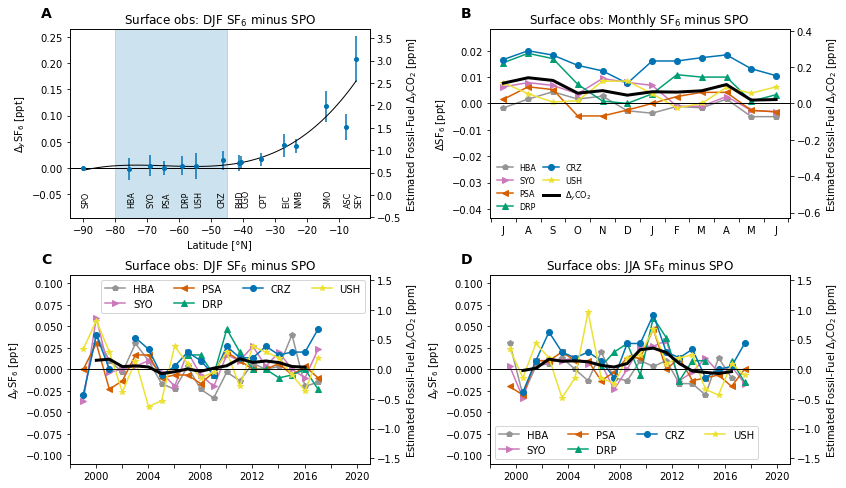

In [7]:
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(
    nrows=2, ncols=2,
    left=0, right=1,
    wspace=0.4, hspace=0.3,
)
axs = []

ax = fig.add_subplot(gs[0, 0])
axs.append(ax)
figure_panels.stn_v_lat(data_a_djf.SF6, ax, 'SF6')    
ax.set_title('Surface obs: DJF SF$_6$ minus SPO')

ax = fig.add_subplot(gs[0, 1])
axs.append(ax)
figure_panels.obs_srf_seasonal(ax, data_a_clm, 'SF6')
ax.set_title('Surface obs: Monthly SF$_6$ minus SPO')


axt = fig.add_subplot(gs[1, 0])
axb = fig.add_subplot(gs[1, 1])
axs.append(axt); axs.append(axb)
figure_panels.obs_srf_trends_djf_jja(
    [axt, axb],
    data_a_djf.SF6.groupby('stncode').mean('record').sel(stncode=obs_surface.southern_ocean_stn_list_sf6),
    data_a_jja.SF6.groupby('stncode').mean('record').sel(stncode=obs_surface.southern_ocean_stn_list_sf6),
    constituent='SF6',
)
axt.set_title('Surface obs: DJF SF$_6$ minus SPO')
axb.set_title('Surface obs: JJA SF$_6$ minus SPO')

util.label_plots(fig, axs)

util.savefig('SF6')